In [4]:
#!pip install scikit-learn

In [27]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler

In [28]:
centers = [0.7, 3.2],
[2.45, 2.89],
[3.47, 1.12],
[5.23, 5.24],
[5.98, 6.23],
[7.778, 8.63],
[8.97, 6.12]

X, labels_True = make_blobs(n_samples = 750, centers=centers, cluster_std=0.4, random_state=0)

X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=3, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

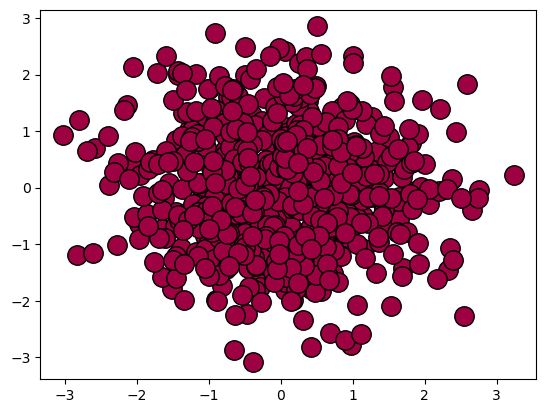

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

unique_labels = set(labels)


colors = [plt.cm.Spectral(each)
         for each in np.linspace(0, 1, len (unique_labels))
         ]

for k, col in zip(unique_labels, colors):
    if k==-1:
        col = [0, 0, 0, 1]
    
    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
            markerfacecolor = tuple(col),
            markeredgecolor='k', markersize=14)
    
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
            markerfacecolor = tuple(col),
            markeredgecolor='k', markersize=6)

plt.show()